In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv('rumah.csv')
df

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,https://www.rumah123.com/properti/tangerang/ho...,5.880000e+08,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,"Masjid, Taman, Tempat Jemuran, Keamanan 24 ja...",rumah,...,1300 mah,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Masjid, Keamanan, Jogging Track, Taman, Tem...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,"Keamanan, Taman, Jogging Track, Tempat Jemur...",rumah,...,1300 mah,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,"Tempat Jemuran, Keamanan, Keamanan 24 jam, Was...",rumah,...,2200 mah,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished


In [4]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [6]:
df.isnull().sum()

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

In [7]:
# 3. Misal kolom 'price' digunakan untuk klasifikasi
# Buat target klasifikasi harga: 0=Murah, 1=Sedang, 2=Mahal
if 'price' in df.columns:
    bins = [0, df['price'].quantile(0.33), df['price'].quantile(0.66), df['price'].max()]
    labels = ['Murah', 'Sedang', 'Mahal']
    df['kategori_harga'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
    df.drop('price', axis=1, inplace=True)  # drop kolom numerik harga

In [8]:
# 4. Encode fitur kategorikal
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [9]:
print(df.columns)


Index(['url', 'price_in_rp', 'title', 'address', 'district', 'city', 'lat',
       'long', 'facilities', 'property_type', 'ads_id', 'bedrooms',
       'bathrooms', 'land_size_m2', 'building_size_m2', 'carports',
       'certificate', 'electricity', 'maid_bedrooms', 'maid_bathrooms',
       'floors', 'building_age', 'year_built', 'property_condition',
       'building_orientation', 'garages', 'furnishing'],
      dtype='object')


In [10]:
bins = [0, df['price_in_rp'].quantile(0.33), df['price_in_rp'].quantile(0.66), df['price_in_rp'].max()]
labels = ['Murah', 'Sedang', 'Mahal']
df['kategori_harga'] = pd.cut(df['price_in_rp'], bins=bins, labels=labels, include_lowest=True)


In [11]:
X = df.drop('kategori_harga', axis=1)
y = df['kategori_harga']


In [12]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 7. Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# 8. Evaluasi
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[240   0   0]
 [  0 244   0]
 [  0   0 227]]
Classification Report:
               precision    recall  f1-score   support

       Mahal       1.00      1.00      1.00       240
       Murah       1.00      1.00      1.00       244
      Sedang       1.00      1.00      1.00       227

    accuracy                           1.00       711
   macro avg       1.00      1.00      1.00       711
weighted avg       1.00      1.00      1.00       711



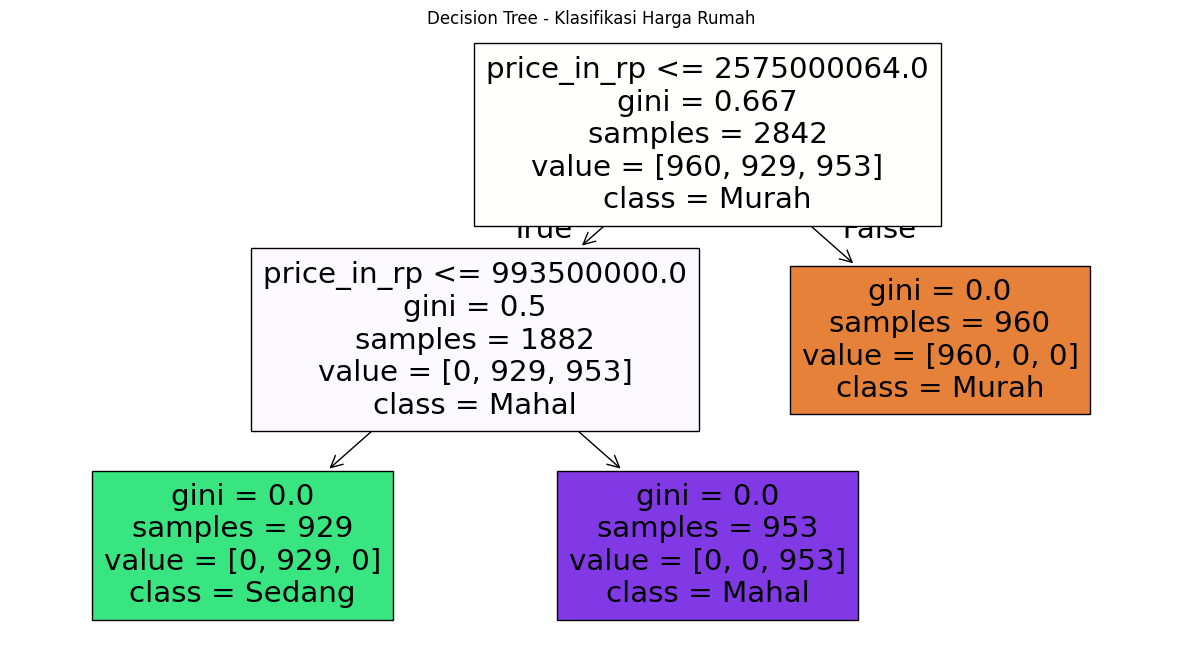

In [19]:
# 9. Visualisasi tree
plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=labels, filled=True)
plt.title("Decision Tree - Klasifikasi Harga Rumah")
plt.show()

In [20]:
import pickle  # Pastikan import dulu
import joblib

filename = 'model_rumah.sav'  # Nama variabel yang konsisten
joblib.dump(model, open(filename, 'wb'))  # Simpan model ke file


In [21]:
print(model.feature_names_in_)

['url' 'price_in_rp' 'title' 'address' 'district' 'city' 'lat' 'long'
 'facilities' 'property_type' 'ads_id' 'bedrooms' 'bathrooms'
 'land_size_m2' 'building_size_m2' 'carports' 'certificate' 'electricity'
 'maid_bedrooms' 'maid_bathrooms' 'floors' 'building_age' 'year_built'
 'property_condition' 'building_orientation' 'garages' 'furnishing']
